In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import glob

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, UpSampling2D
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
%matplotlib inline

In [0]:
TRAIN_IMAGES = glob.glob('/content/gdrive/My Drive/Colab Notebooks/valve+6db_encoder/trainingSet/0/*.jpg')

In [0]:
TEST_IMAGES = glob.glob('/content/gdrive/My Drive/Colab Notebooks/valve+6db_encoder/testSet/0/*.jpg')

In [0]:

TRAIN_IMAGES = glob.glob('/content/gdrive/My Drive/Colab Notebooks/t_autoencoder/trainingSet/1/*.jpg')
TEST_IMAGES = glob.glob('/content/gdrive/My Drive/Colab Notebooks/t_autoencoder/testSet/0/*.jpg')

def load_image(path):
    image_list = np.zeros((len(path),560, 420, 3))
    for i, fig in enumerate(path):
        img = image.load_img(fig, color_mode='rgb', target_size=(560, 420))
        x = image.img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

x_train = load_image(TRAIN_IMAGES)
x_test = load_image(TEST_IMAGES)



In [0]:
print(x_train.shape, x_test.shape)

(100, 560, 420, 3) (100, 560, 420, 3)


In [0]:
x_train = load_image(TRAIN_IMAGES)

In [0]:
x_test = load_image(TEST_IMAGES)

In [0]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [0]:
print(x_train.shape)
print(x_test.shape)
print(x_train)

(100, 705600)
(100, 705600)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 705600)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                45158464  
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_6 (Dense)              (None, 705600)            4586

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


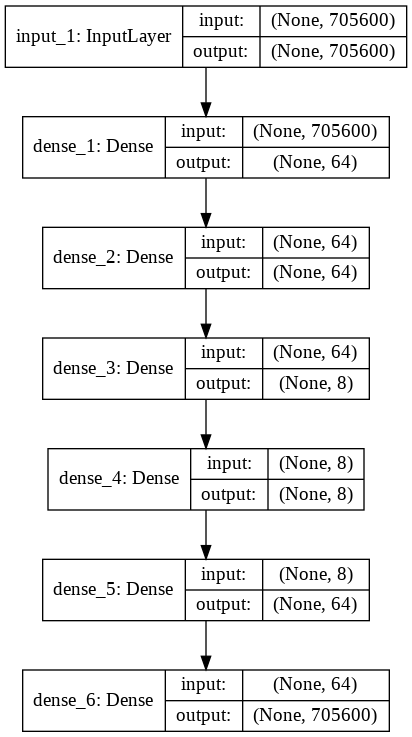

In [0]:
input_img=Input(shape=(705600,))
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(705600, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 100 samples, validate on 100 samples
Epoch 1/50



100/100 [==============================] - 29s 286ms/step - loss: 0.6931 - acc: 0.1775 - val_loss: 0.6931 - val_acc: 0.1778
Epoch 2/50
100/100 [==============================] - 25s 246ms/step - loss: 0.6931 - acc: 0.1782 - val_loss: 0.6931 - val_acc: 0.1785
Epoch 3/50
100/100 [==============================] - 25s 246ms/step - loss: 0.6931 - acc: 0.1793 - val_loss: 0.6931 - val_acc: 0.1801
Epoch 4/50
100/100 [==============================] - 25s 246ms/step - loss: 0.6931 - acc: 0.1817 - val_loss: 0.6929 - val_acc: 0.1838
Epoch 5/50
100/100 [==============================] - 25s 247ms/step - loss: 0.6926 - acc: 0.1875 - val_loss: 0.6920 - val_acc: 0.1931
Epoch 6/50
100/100 [==============================] - 25s 246ms/step - loss: 0.6896 - acc: 0.2027 - val_loss: 0.6835 - val_acc: 0.2194
Epoch 7/50
100/100 [==============================] - 25s 245ms/step - loss: 0.6488 - acc: 0.2538 - val_loss: 0.5465 - val_acc: 0.3195
Epoch 8/50
100/100 [==============================] - 25s 246ms/st